# Hypothesis testing problem

### **Exercise 1**

#### ANOVA

Suppose that a study wants to check if there is a significant difference between the goal averages of soccer players depending on the position in which they play. In case there is a difference, you want to know which positions differ from the rest.

NOTE: You must replace the values <<<FIXME>>>.

**Exercise: Load data from "datos_laliga.csv". It contains a sample of randomly selected players.**

In [16]:
import pandas as pd
import numpy as np
my_data = pd.read_csv("/workspaces/PROGRAMA-DOOR-PROYECT-7-SOLUCIONADOgustavolima-hypothesis-testing-exercises-project-with-python/notebook/assets/datos_laliga.csv")

In [17]:
my_data.describe()


"""
La función .describe():
    -es una función comúnmente utilizada en el análisis exploratorio de datos para obtener estadísticas descriptivas de un conjunto de datos.
    -Proporciona un resumen estadístico que incluye diversas medidas para cada columna numérica del DataFrame:

El contenido:
    -Count (Cuenta): El número de valores no nulos presentes en la columna.
    -Mean (Media): El promedio aritmético de los valores en la columna.
    -Std (Desviación estándar): La medida de dispersión que indica cuánto varían los valores de la columna con respecto a la media.
    -Min (Mínimo): El valor mínimo en la columna.
    -25%, 50%, 75% (Percentiles): Los percentiles correspondientes al 25%, 50% (también conocido como la mediana) y 75% de los valores en la columna
    -median (Mediana, que es el 50% o 2º cuartilo percentil 50)
    -Max (Máximo): El valor máximo en la columna.
."""

'\nLa función .describe():\n    -es una función comúnmente utilizada en el análisis exploratorio de datos para obtener estadísticas descriptivas de un conjunto de datos.\n    -Proporciona un resumen estadístico que incluye diversas medidas para cada columna numérica del DataFrame:\n\nEl contenido:\n    -Count (Cuenta): El número de valores no nulos presentes en la columna.\n    -Mean (Media): El promedio aritmético de los valores en la columna.\n    -Std (Desviación estándar): La medida de dispersión que indica cuánto varían los valores de la columna con respecto a la media.\n    -Min (Mínimo): El valor mínimo en la columna.\n    -25%, 50%, 75% (Percentiles): Los percentiles correspondientes al 25%, 50% (también conocido como la mediana) y 75% de los valores en la columna\n    -median (Mediana, que es el 50% o 2º cuartilo percentil 50)\n    -Max (Máximo): El valor máximo en la columna.\n.'

**Exercise: Identify the number of groups and number of observations per group to determine if it is a balanced model. The mean and standard deviation of the group are also calculated.**

In [18]:
group_counts = my_data['position'].value_counts()   #-> my_data['position']:
                                                        #->Esto selecciona la columna 'position' del DataFrame 
                                                    #->.value_counts(): Funcion de pandas
                                                        #-> que se aplica a una serie (una columna de un DataFrame)
                                                        #-> Funcion:
                                                            #-> Cuenta la frecuencia de cada valor único en esa serie. 
                                                            #-> Devuelve una nueva serie donde los índices son los valores únicos
                                                    #->my_data['position'].value_counts():
                                                        #-> se obtiene  serie donde los índices son los valores únicos encontrados en la columna
                                                            # position' y los valores son las frecuencias de cada valor.
 
num_groups = len(group_counts)                      #-> Funcion len:
                                                        #->Se utiliza para obtener la longitud de un objeto.
                                                            #->La sintaxis básica es len(objeto)
                                                            #->"objeto" puede ser  cadena de texto,  lista, tupla, un diccionario o dato iterable.

print("Número de grupos:", num_groups)
print("Número de observaciones por grupo:")
print(group_counts)

# Media y desviación típica del grupo
group_stats = my_data.groupby('position')['average'].agg(['mean', 'std'])
                                                            #->my_data.groupby('position'):
                                                                #-> Esta parte del código realiza un agrupamiento de los datos en el DataFrame my_data
                                                                    #según los valores únicos en la columna 'position'. 
                                                                    #Esto crea un objeto de tipo GroupBy, que representa los grupos formados.

                                                            #->['average']: 
                                                                #-> Después del agrupamiento, se accede a la columna 'average' 
                                                                    #en los grupos utilizando la sintaxis de corchetes ('[]'). 
                                                                    #Esto selecciona la columna 'average' 
                                                                    #Fin: para calcular las estadísticas dentro de cada grupo.

                                                            #.agg(['mean', 'std']): 
                                                                #->Esta parte aplica la función de agregación a la columna 'average' dentro de cada grupo.
                                                                #->En este caso, se utilizan dos funciones de agregación:
                                                                    #'mean' para calcular la media
                                                                    # 'std' para calcular la desviación estándar.
                                                                #-> El resultado: DataFrame con los valores de media y desviación estándar para cada grupo.

print("\nEstadísticas del grupo:")
print(group_stats)




#DC: Delantero centro
#MO: Medio ofensivo
#MP: Media punta
#P: Puntero

Número de grupos: 4
Número de observaciones por grupo:
position
DC    154
MP    120
P      39
MO     14
Name: count, dtype: int64

Estadísticas del grupo:
              mean       std
position                    
DC        0.331526  0.037095
MO        0.347786  0.036037
MP        0.334250  0.029444
P         0.322615  0.045132


**Exercise: Calculate the mean and standar deviation by position**

In [19]:
my_data.groupby('position')['average'].agg('mean')

position
DC    0.331526
MO    0.347786
MP    0.334250
P     0.322615
Name: average, dtype: float64

**Exercise: Calculate the standard deviation by position**

In [20]:
my_data.groupby('position')['average'].agg('std')

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

Since the number of observations per group is not constant, it is an unbalanced model. It is important to take this into account when checking the conditions of normality and homoscedasticity (s1 = s2 = s3 = s4). The most useful graphical representation before performing an ANOVA is the Box-Plot model.

**Exercise: Plot a boxplot for each position**

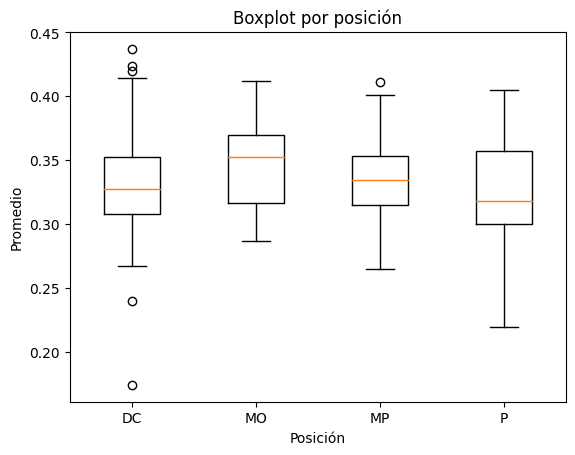

In [21]:
import matplotlib.pyplot as plt                                 #-> Importamos libreria

# Crear el boxplot por posición
plt.boxplot([my_data[my_data['position'] == 'DC']['average'],   #->my_data[my_data['position'] == 'DC']['average'] 
                                                                    #->selecciona los valores de la columna 'average' de la variable my_data 
                                                                        #donde la columna 'position' tiene el valor 'DC'. 
                                                                        #Esto representa los promedios para la posición 'DC'.
             my_data[my_data['position'] == 'MO']['average'],
             my_data[my_data['position'] == 'MP']['average'],
             my_data[my_data['position'] == 'P']['average']])

# Agregar etiquetas a los ejes x e y
plt.xlabel('Posición')                                          #-> X "position" representa las diferentes categorías o posiciones
plt.ylabel('Promedio')                                          #-> Y "average" representa los valores promedio 
plt.title('Boxplot por posición')                               #-> Titulo de la grafica,.
                                                                    #-> En un boxplot eje X generalmente se utiliza para mostrar las categorías o grupos
                                                                    #-> El eje Y para representar los valores numéricos asociados a esas categorías.
                                                                    #-> En este caso comparamos  distribuciones de  valores promedio para cada posición, 
                                                                    #-> por lo que se asigna "position" al eje x y "average" al eje y.

# Agregar etiquetas a los ticks del eje x
positions = ['DC', 'MO', 'MP', 'P']                             #-> Lista position
plt.xticks(range(1, len(positions) + 1), positions)             #->plt.xticks:Se utiliza para personalizar los ticks (marcas) en el eje x del gráfico.
                                                                    #->plt.xticks() especifica las posiciones donde se ubicarán los ticks en el eje x.
                                                                    #->ARGUMENTO 1:  range(1, len(positions) + 1):
                                                                        #->para generar secuencia de nº desde 1 hasta longitud delista positions más 1
                                                                    #-> ARGUMENTO 2: positions:
                                                                        #-> Lista de etiquetas que se asignarán a los ticks en el eje x
                                                                        #-> En este caso, se utiliza la lista positions que contiene nombres de  posiciones 
                                                                        #->('DC', 'MO', 'MP', 'P'). Cada etiqueta se asignará a un tick en la posición correspondiente.

# Mostrar el gráfico
plt.show()                                                      #-> Imprime el grafico


#### Independence

The total sample size is <10% of the population of all players in the league. The groups (categorical variable) are independent of each other since a random sample of players from the entire league (not just from the same team) has been made.

Normal distribution of observations: The quantitative variable must be distributed in a normal way in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

**Exercise: Make an analysis about normal distribution for each position**

In [22]:
# Using plotly
import plotly.graph_objects as go       #-> Se importa la biblioteca Plotly con el alias "go"
                                            #-> Módulo de la biblioteca Plotly
                                            #-> Proporciona una interfaz orientada a objetos para crear gráficos interactivos y visualizaciones en Python.
                                            #-> USOS GENERALES:
                                                #-> gráficos de líneas
                                                #-> gráficos de dispersión
                                                #-> gráficos de barras
                                                #-> diagramas de caja
                                                # -> diagramas de violín
                                                # ->superficies 3D
                                                #->gráficos de contorno

                                        #-> MODULO plotly.graph_objects:
                                            #-> Proporciona una API orientada a objetos para crear y personalizar gráficos
                                            #-> permite ajustar cada aspecto del gráfico,títulos, etiquetas de ejes, colores, estilos de línea, marcadores
                                            #-> Conocido por su capacidad de generar gráficos interactivos
                                            #-> Nos permite explorar y analizar los datos mediante zoom, desplazamiento, selección y otras acciones interactivas.

fig = go.Figure()                       #-> Se crea una nueva figura (objeto Figure) utilizando go.Figure().
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "DC","average"], name="DC"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MO","average"], name="MO"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MP","average"], name="MP"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "P","average"], name="P"))
                                        #-> add_trace():
                                            #-> Se agregan las trazas de cada posición al gráfico de caja utilizando la función 
                                            #->  Cada traza corresponde a un grupo de datos de una posición específica.
                                            #-> DEFINICION:
                                                #->Sirve para agregar trazas individuales a un objeto Figure
                                                #->una Traza representa un conjunto de datos y  características asociadas que se deben visualizar
                                            #-> PROPOSITO PRINCIPAL:
                                                #-> agregar información específica de cada traza al gráfico que se está creando
                                                #-> Cada llamada a add_trace() agrega una traza adicional al objeto Figure (Hay 4 llamadas)
                                                #-> Un ejemplo común de Trace es go.Box() para crear un gráfico de caja

                                        #-> go.Box(): 
                                            #-> Argumento Y = se especifica el argumento
                                            #-> para indicar los datos que se utilizarán en el eje y 
                                                #->(en este caso, los valores de "average" para cada posición).

                                        #-> .LOC
                                            #-> método en Pandas que se utiliza para indexar y acceder a  datos en un DataFrame por etiquetas de índice.
                                            #-> Permite realizar selecciones basadas en etiquetas de fila y columna.
                                            #-> sintaxis general de .loc es:  df.loc[filas, columnas]
                                            #-> AQUI:
                                                #-> Selecciona la columna "average" para filas en las que valor de  columna "position" sea igual a "DC".
                                             
                                        #-> argumento name:
                                            #-> para asignar un nombre descriptivo a cada traza (por ejemplo, "DC", "MO", "MP", "P").
fig.show()                              #-> Imprime la figura.

"""
El gráfico resultante es un conjunto de cuatro diagramas de caja, uno para cada posición.
Muestra la distribución de los valores de "average" en cada grupo. 
Esto permite comparar visualmente las distribuciones y detectar posibles diferencias en:
    -la media
    -dispersión
    - posible presencia de valores atípicos entre las diferentes posiciones.
"""

'\nEl gráfico resultante es un conjunto de cuatro diagramas de caja, uno para cada posición.\nMuestra la distribución de los valores de "average" en cada grupo. \nEsto permite comparar visualmente las distribuciones y detectar posibles diferencias en:\n    -la media\n    -dispersión\n    - posible presencia de valores atípicos entre las diferentes posiciones.\n'

**Exercise: Use the Kolmogorov-Smirnov test or with or without the Lilliefors correction in order to know the normality distribution.**

In [23]:
# Beginner way to do i
from statsmodels.stats.diagnostic import lilliefors     #-> El módulo lilliefors en la librería statsmodels
                                                        #-> es una implementación de la corrección de Lilliefors para el test de normalidad de Kolmogorov
                                                        #-> Esta función proporciona una forma conveniente de realizar la prueba de Lilliefors en Python.


my_df = pd.DataFrame(index=np.arange(len(np.unique(my_data["position"]))), columns=["position", "D_statistic", "p_value"])
                                                        #->my_df = pd.DataFrame(...):
                                                            #-> Crea un nuevo DataFrame llamado my_df utilizando la función DataFrame 
                                                            #->Esto inicializa un DataFrame vacío con las columnas especificadas.

                                                        #->index=np.arange(len(np.unique(my_data["position"])))
                                                            #-> Define el índice del DataFrame utilizando:
                                                                #-> np.arange y np.unique. np.unique(my_data["position"])
                                                                 #-> Devuelve los valores únicos de la columna "position" del DataFrame my_data
                                                                 #-> Len calcula la longitud de ese array de valores únicos

                                                            #-> np.arange:
                                                                #-> genera una secuencia de números enteros desde 0
                                                                    #->HASTA  len(np.unique(my_data["position"])) - 1. 
                                                                    #->Esto crea un rango de índices que se utilizará en el DataFrame.

                                                            #-> columns=["position", "D_statistic", "p_value"]:
                                                                #-> Define las columnas del DataFrame my_df. 
                                                                #-> El DataFrame tendrá tres columnas llamadas "position", "D_statistic" y "p_value". 
                                                                       
my_df["position"] = np.unique(my_data["position"])      #->my_data["position"]: 
                                                            #-> Aquí se accede a la columna "position" del DataFrame my_data. 
                                                        
                                                        #-> np.unique(my_data["position"]):
                                                            #-> np.unique para obtener los valores únicos de la columna "position" 
                                                            #-> devuelve un nuevo array con los valores únicos ordenados en orden ascendente.

for position in my_df["position"]:                      #-> Bucle For en rango de la columna position

    my_data_subset = my_data.loc[my_data["position"] == position,:] #-> my_data: Es el nombre del DataFrame 

                                                                    #->.LOC:
                                                                        #-> se utiliza para acceder y realizar selecciones en un DataFrame
                                                                        #-> Proporciona una forma flexible de acceder a filas y columnas
                                                                            #-> Se hace utilizando etiquetas

                                                                    #-> my_data["position"] == position
                                                                        #-> Establece una condición para la selección.
                                                                        #-> Compara valores de la columna "position" con el valor especificado position
                                                                        #-> Esto devuelve una serie booleana
                                                                            #-> True para las filas en las que la condición se cumple
                                                                            #-> False para las filas en las que no se cumple
                                                                            

    D_statistic, p_value = lilliefors(my_data_subset.average)   #-> D_statistic: 
                                                                    #->almacena el valor del estadístico de prueba (D) 
                                                                        #obtenido al realizar el test de Lilliefors.
                                                                #->p_value: 
                                                                    #-> Esta variable almacena el valor p resultante del test de Lilliefors.

"""
En resumen, la línea de código ejecuta el test de Lilliefors utilizando como entrada los valores de la columna "average" del DataFrame my_data_subset. 
Luego, asigna el valor del estadístico de prueba a D_statistic y el valor p correspondiente a p_value. 
Estas variables se pueden utilizar posteriormente para evaluar la normalidad de los datos y realizar inferencias estadísticas.
"""
my_df.loc[my_df["position"]==position,["D_statistic", "p_value"]] = D_statistic, p_value
                                                            #->my_df.loc[my_df["position"]==position,["D_statistic", "p_value"]]:
                                                                #-> .loc para seleccionar las filas en las que los valores de la columna "position"
                                                                    #del DataFrame my_df sean iguales a position. 
                                                                    #selecciona las columnas "D_statistic" y "p_value". 
                                                                    #Esto crea una vista del DataFrame my_df que cumple con las condiciones de selección.
                                                                #-> D_statistic, p_value:
                                                                    #-> signa valores de D_statistic y p_value a las filas y columnas seleccionadas del DF

print(my_df)

  position D_statistic   p_value
0       DC         NaN       NaN
1       MO         NaN       NaN
2       MP         NaN       NaN
3        P    0.087208  0.634941


In [26]:
#Another way to do it (Highly recommendable) / #Otra forma de hacerlo (Muy recomendable)
print(my_data.groupby("position")["average"].apply(lambda x: lilliefors(x)))


#-> my_data.groupby("position"): 
    #-> Esto agrupa los datos del DataFrame my_data por los valores únicos de la columna "position". 
 

#-> ["average"]: Selecciona la columna "average" de cada grupo.

#->.apply(lambda x: lilliefors(x)): 
    #-> El metodo apply: Aplica una función lambda a cada grupo de datos seleccionado. 
    #-> La función lambda toma cada grupo de datos como entrada y aplica el test de Lilliefors utilizando la función lilliefors().

"""
el código realiza el test de Lilliefors de normalidad en la columna "average" para cada grupo de datos en my_data, 
separados por los valores únicos de la columna "position". 
El resultado es un objeto que contiene los resultados del test de Lilliefors para cada grupo de datos.
"""

position
DC    (0.07065325441241377, 0.08449497937163018)
MO     (0.11204872375044372, 0.9035667916170158)
MP    (0.044082291017247144, 0.8550765299661607)
P      (0.08720833565943192, 0.6349406883319556)
Name: average, dtype: object


'\nel código realiza el test de Lilliefors de normalidad en la columna "average" para cada grupo de datos en my_data, \nseparados por los valores únicos de la columna "position". \nEl resultado es un objeto que contiene los resultados del test de Lilliefors para cada grupo de datos.\n'

The hypothesis tests do not show evidence of a lack of normality.

Constant variance between groups (homoscedasticity):

Given that there is a group (DC) that is at the limit to accept that it is distributed in a normal way, the Fisher and Bartlett tests are not recommended. Instead it is better to use a test based on the median Levene test or the Fligner-Killeen test.

**Exercise: use the fligner and levene functions from scipy.stats in order to know the homocedasticy**

In [28]:
from scipy import stats

values_array = pd.DataFrame(my_data.groupby("position")["average"]).to_numpy()

print(stats.fligner(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

print(stats.levene(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

# stats.fligner(values_array[:,1]) # It doesn't work, please analyse (SIGUE LEYENDO)


FlignerResult(statistic=6.97244018401731, pvalue=0.07278140457833458)
LeveneResult(statistic=2.6056585191080566, pvalue=0.051799415350941756)


There is no significant evidence of lack of homoscedasticity in either of the two tests.

The study of the conditions can be carried out after calculating the ANOVA, since if they are not fulfilled, it does not make much sense to continue. However, the most appropriate way to verify that the necessary conditions are satisfied is by studying the model residuals once the ANOVA has been generated.

**Exercise: make an ANOVA table and analyze the p-value using the packages statsmodels and the bioinfokit**

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('average ~ position', data=my_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
position,0.007557,3.0,1.994349,0.114693
Residual,0.407984,323.0,NaN,NaN


In [31]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=my_data, res_var='value', anova_model='average ~ position')
res.anova_summary
# output (ANOVA F and p value)

ModuleNotFoundError: No module named 'bioinfokit'

**Exercise: make a plot of the fitted values vs residuals. Make the plot of the Standardized Residuals. Make the histogram of the residuals.**

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(res.anova_model_out.fittedvalues, res.anova_model_out.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

NameError: name 'res' is not defined

Given that the p-value is higher than 0.05, there is not enough evidence to consider that at least two means are different. The graphical representation of the residuals does not show lack of homoscedasticity (graph 1) and in the qqplot the residuals are distributed very close to the normal line (graph 2 and 3).

### **Exercise 2**

#### T-TEST INDEPENDENT

A professor gives online lectures. Later, he uploads recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

```py
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]


asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]
```

Conduct the hypothesis testing to check whether the professor’s belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.

**1. Defining Hypothesis**

H₀: μₛ≤μₐ

H₁: μₛ>μₐ

**2. Assumption Check**

H₀: The data is normally distributed.

H₁: The data is not normally distributed.

Assume that α=0.05. If the p-value is >0.05, it can be said that data is normally distributed.

In [ ]:
# import libraries

In [ ]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")    

In [ ]:
#define veriables

In [33]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")  

        
#define veriables
sincrónico = [94.0, 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]
asíncrono = [77.1, 71.7, 91.0, 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]
#check normality
print("Sincrónico:")
check_normality(sincrónico)
check_normality(asíncrono)

Sincrónico:
p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


H₀: The variances of the samples are the same.

H₁: The variances of the samples are different.

In [34]:

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). Suppose the resulting p-value of Levene’s test is less than the significance level (typically 0.05). In that case, the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances.

In [35]:
check_normality(sincrónico)
check_normality(asíncrono)

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


Are assumptions satisfied?

In [ ]:
from scipy import stats

sincrónico = [94.0, 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]
asíncrono = [77.1, 71.7, 91.0, 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

t_statistic, p_value = stats.ttest_ind(sincrónico, asíncrono)

print("Estadística de prueba t:", t_statistic)
print("Valor p:", p_value)


CONCLUSION: 

Hay evidencia para determinar que la calificación promedio de los estudiantes que siguen el curso sincrónicamente tiende a ser y es mas alta que los asincronicos. 